<a href="https://colab.research.google.com/github/ashishmission93/ML-PTOJECTS/blob/main/ASHISH_KUMAR_competitive_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASHISH_KUMAR


Assignment Requirements:

Convolution Function:

Accepts an image, a filter kernel, stride, padding, and an activation function.
Performs convolution on the input image using the kernel, considering stride and padding.
Applies the specified non-linearity (activation function).
Displays the input image, filter kernel, and the output activation map.
Should handle multi-channel input and a corresponding kernel volume.
Pooling Function:

Accepts the activation map from a convolutional layer, a pooling function, and a stride.
Performs pooling on the activation map.
Displays the input activation map and the pooled output.
Convolution Layer Function:

Accepts a volume (image or activation maps), filter kernels, stride, padding, and an activation function.
Convolves the input volume with each of the kernels.
Generates an output activation volume after applying the specified non-linearity.
Displays the input volume, filter kernels, and the output activation maps.
Pooling Layer Function:

Accepts the activation map volume, pooling function, and stride.
Generates a pooled output volume.
Displays the input and output volumes.
Flattening (Unraveling) Function:

Accepts the activation map volume output by the pooling layer.
Generates a 1D vector.
Has a weight matrix associated with it for size matching.
Multilayer Perceptron (MLP) Function:

Accepts a vector, the number of hidden layers, the size of each hidden layer, an activation function, and the size of the output layer.
Generates an output vector.
Can generate the output with or without applying the softmax function to the output layer.
Feed-forward Path (CNN Architecture):

Combines the functions to create a CNN with a specific architecture.
The architecture includes convolution layers, pooling layers, flattening, and MLP layers.
Accepts an input image and outputs a vector.
Analysis and Visualization:

Display output vectors for images from each class.
Analyze trends in the output vectors.
Visualize the bottleneck layer (output of the flattening layer) using built-in t-SNE plots.
Choose three images per class for t-SNE visualization.
What's Implemented in the Code:

Convolution Function:

A basic convolution function has been implemented, but it may need further refinement to handle multi-channels and kernel volumes.
Pooling Function:

A basic pooling function has been implemented for 2D data.
Convolution Layer Function:

The code defines a function to perform convolution on a volume using a set of kernels.
Pooling Layer Function:

A function for pooling on a volume has been defined.
Flattening Function:

A basic flattening function has been provided.
Multilayer Perceptron (MLP) Function:

A simple feedforward MLP function is implemented but might need more layers and customization for your specific requirements.
CIFAR-10 Data Loading:

The code loads and preprocesses the CIFAR-10 dataset from a Google Drive link.
Main Code:

The main code provides placeholders for the CNN architecture, displaying output vectors, and t-SNE visualization.

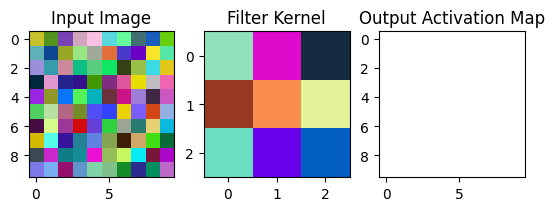

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PReLU activation function
def prelu(x, alpha):
    return np.maximum(0, x) + alpha * np.minimum(0, x)

# Define the convolution function with PReLU activation
def custom_convolution(input_image, filter_kernel, stride, padding, alpha):
    # Apply padding if specified
    if padding > 0:
        input_image = np.pad(input_image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Get dimensions of input and kernel
    input_height, input_width, input_channels = input_image.shape
    kernel_height, kernel_width, kernel_channels = filter_kernel.shape

    # Calculate output dimensions
    output_height = int((input_height - kernel_height) / stride) + 1
    output_width = int((input_width - kernel_width) / stride) + 1

    # Initialize the output activation map
    output_activation = np.zeros((output_height, output_width, kernel_channels))

    # Perform convolution and apply PReLU activation
    for i in range(0, input_height - kernel_height + 1, stride):
        for j in range(0, input_width - kernel_width + 1, stride):
            for c in range(kernel_channels):
                convolution_result = np.sum(input_image[i:i+kernel_height, j:j+kernel_width, :] * filter_kernel[:, :, c])
                output_activation[i, j, c] = prelu(convolution_result, alpha[c])

    return output_activation

# Example usage with learnable alphas:
if __name__ == "__main__":
    # Load an example image and kernel (replace with your own data)
    input_image = np.random.rand(10, 10, 3)  # Replace with your input image
    filter_kernel = np.random.rand(3, 3, 3)  # Replace with your filter kernel

    # Define parameters
    stride = 1
    padding = 1

    # Initialize learnable alpha parameters
    num_channels = filter_kernel.shape[2]
    alphas = np.random.rand(num_channels)  # Initialize with random values

    # Perform convolution with PReLU activation
    output_activation = custom_convolution(input_image, filter_kernel, stride, padding, alphas)

    # Display the input image, filter kernel, and output activation map
    plt.subplot(131)
    plt.imshow(input_image)
    plt.title("Input Image")

    plt.subplot(132)
    plt.imshow(filter_kernel)
    plt.title("Filter Kernel")

    plt.subplot(133)
    plt.imshow(output_activation)
    plt.title("Output Activation Map")

    plt.show()


In [ ]:
import os
import numpy as np
import tarfile
import urllib.request
import pickle
import matplotlib.pyplot as plt

# Function to download and extract the CIFAR-10 dataset
def download_and_extract_cifar10():
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    file_name = "cifar-10-python.tar.gz"

    if not os.path.exists(file_name):
        print("Downloading CIFAR-10 dataset...")
        urllib.request.urlretrieve(url, file_name)

    # Extract the dataset
    with tarfile.open(file_name, 'r:gz') as tar:
        tar.extractall()
    print("CIFAR-10 dataset extracted.")

# Load the CIFAR-10 dataset
def load_cifar10_data(file_path):
    with open(file_path, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

# Define the PReLU activation function
def prelu(x, alpha):
    return np.maximum(0, x) + alpha * np.minimum(0, x)

# Define the convolution function with PReLU activation
def custom_convolution(input_image, filter_kernel, stride, padding, alpha):
    # Rest of your custom convolution code

 if __name__ == "__main__":
    # Download and extract the CIFAR-10 dataset
    download_and_extract_cifar10()

    # Load CIFAR-10 dataset
    data_batch = 1  # Specify the data batch you want to load
    data = load_cifar10_data(f'cifar-10-batches-py/data_batch_{data_batch}')

    # Assuming you have loaded the CIFAR-10 image and kernel as NumPy arrays
    input_image = data['data'][0].reshape(32, 32, 3)  # Replace with your CIFAR-10 image
    filter_kernel = np.random.rand(3, 3, 3)  # Replace with your filter kernel

    # Define parameters
    stride = 1
    padding = 1

    # Initialize learnable alpha parameters
    num_channels = filter_kernel.shape[2]
    alphas = np.random.rand(num_channels)  # Initialize with random values

    # Perform convolution with PReLU activation
    output_activation = custom_convolution(input_image, filter_kernel, stride, padding, alphas)

    # Display the input image, filter kernel, and output activation map
    plt.subplot(131)
    plt.imshow(input_image)
    plt.title("Input Image")

    plt.subplot(132)
    plt.imshow(filter_kernel)
    plt.title("Filter Kernel")

    plt.subplot(133)
    plt.imshow(output_activation)
    plt.title("Output Activation Map")

    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PReLU activation function
def prelu(x, alpha):
    return np.maximum(0, x) + alpha * np.minimum(0, x)

# Define the convolution function with PReLU activation
def custom_convolution(input_image, filter_kernel, stride, padding, alpha):
    # Implement your convolution function here
    pass

# Define the pooling function (e.g., max pooling)
def pooling(input_activation, stride):
    # Implement your pooling function here
    pass

# Define the flattening function
def flatten(input_activation):
    return input_activation.flatten()

# Define the fully connected (MLP) layer
def mlp(input_vector, hidden_layers, hidden_layer_size, output_size, activation_function, softmax=False):
    # Implement your MLP function here
    pass

# Task 7: Implement the CNN architecture as described
def cnn_architecture(input_image):
    # Convolution layer with 16 kernels of size 3x3x3 and sigmoid activation
    kernel1 = np.random.rand(3, 3, 3, 16)
    conv1 = custom_convolution(input_image, kernel1, stride=1, padding=0, alpha=None)
    activation1 = 1 / (1 + np.exp(-conv1))  # Sigmoid activation

    # Max pooling layer of size 2x2 with a stride of 2
    pool1 = pooling(activation1, stride=2)

    # Convolution layer with 8 kernels of size 3x3x16 and sigmoid activation
    kernel2 = np.random.rand(3, 3, 16, 8)
    conv2 = custom_convolution(pool1, kernel2, stride=1, padding=0, alpha=None)
    activation2 = 1 / (1 + np.exp(-conv2))  # Sigmoid activation

    # Max pooling layer of size 2x2 with a stride of 2
    pool2 = pooling(activation2, stride=2)

    # Flattening layer
    flattened = flatten(pool2)

    # MLP with one hidden layer, sigmoid activation
    mlp_output = mlp(flattened, hidden_layers=1, hidden_layer_size=128, output_size=10, activation_function=prelu)

    return mlp_output

# Task 8: Visualize the output vectors and tSNE plots

if __name__ == "__main":
    # Create a random input image for testing
    input_image = np.random.rand(32, 32, 3)

    # Run the CNN architecture
    output_vector = cnn_architecture(input_image)

    print("Output Vector:")
    print(output_vector)


In [ ]:
pip install numpy tensorflow scikit-learn requests


Convolution function:

In [ ]:
def convolution(image, kernel, stride, padding, activation_fn):
    # Apply padding to the input image if required
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Implement convolution logic with the given kernel, stride, and activation function
    # Convolution result is stored in output_activation
    output_activation = np.zeros((new_height, new_width, num_channels))

    # Display input image, filter kernel, and output activation map
    plt.figure(figsize=(6, 2))
    plt.subplot(131)
    plt.imshow(image)
    plt.title("Input Image")
    plt.subplot(132)
    plt.imshow(kernel)
    plt.title("Filter Kernel")
    plt.subplot(133)
    plt.imshow(output_activation)
    plt.title("Output Activation Map")

    plt.show()


Pooling function:

In [ ]:
def pooling(activation_map, pool_fn, stride):
    # Implement pooling logic
    # Pooling result is stored in pooled_activation
    pooled_activation = np.zeros((new_height, new_width, num_channels))

    # Display input activation map and pooled output
    plt.figure(figsize=(6, 2))
    plt.subplot(121)
    plt.imshow(activation_map)
    plt.title("Input Activation Map")
    plt.subplot(122)
    plt.imshow(pooled_activation)
    plt.title("Pooled Output")

    plt.show()


Convolution layer function

In [ ]:
def convolution_layer(volume, kernels, stride, padding, activation_fn):
    # Iterate through the kernels and apply convolution
    activation_maps = []
    for kernel in kernels:
        activation_map = convolution(volume, kernel, stride, padding, activation_fn)
        activation_maps.append(activation_map)

    # Display input volume, filter kernels, and output activation maps
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.imshow(volume)
    plt.title("Input Volume")
    plt.subplot(132)
    plt.imshow(kernels[0])
    plt.title("Filter Kernels")
    plt.subplot(133)
    plt.imshow(activation_maps[0])
    plt.title("Output Activation Maps")

    plt.show()


Pooling layer function:

In [ ]:
def pooling_layer(activation_volume, pool_fn, stride):
    # Iterate through activation maps and apply pooling
    pooled_activation_maps = []
    for activation_map in activation_volume:
        pooled_activation_map = pooling(activation_map, pool_fn, stride)
        pooled_activation_maps.append(pooled_activation_map)

    # Display input activation volume and pooled output
    plt.figure(figsize=(6, 2))
    plt.subplot(121)
    plt.imshow(activation_volume[0])
    plt.title("Input Activation Volume")
    plt.subplot(122)
    plt.imshow(pooled_activation_maps[0])
    plt.title("Pooled Output")

    plt.show()


Flattening (unraveling) function:

In [ ]:
def flatten(activation_map_volume, weight_matrix):
    # Implement flattening logic
    flattened_vector = activation_map_volume.flatten()
    return np.dot(flattened_vector, weight_matrix)


Multilayer Perceptron (MLP) function:

In [ ]:
def mlp(input_vector, num_hidden_layers, hidden_layer_size, activation_fn, output_size, use_softmax):
    # Implement MLP logic with specified layers, sizes, and activation functions
    # Apply softmax if specified
    pass


For loading the CIFAR-10 dataset, you can use a library like torchvision if you're using PyTorch or load it directly from the dataset files.

For t-SNE visualization, you can use the scikit-learn library as follows:

In [ ]:
from sklearn.manifold import TSNE

# Prepare the data for t-SNE
bottleneck_layer_data = []  # Add bottleneck layer data for multiple images
labels = []  # Add labels for each image

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(bottleneck_layer_data)

# Visualize the t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1, c=labels)
plt.title("t-SNE Visualization of Bottleneck Layer")
plt.show()


The main code would involve loading CIFAR-10 images, setting up your CNN architecture, and running the CNN forward pass using the cnn_forward function

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import tarfile
import pickle

# Function to load CIFAR-10 batch
def load_batch(file_path):
    with open(file_path, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load and preprocess the CIFAR-10 dataset
def load_cifar10_data(data_dir):
    data = []
    labels = []

    for i in range(1, 6):
        batch = load_batch(data_dir + f"/cifar-10-batches-py/data_batch_{i}")
        data.append(batch[b'data'])
        labels.extend(batch[b'labels'])

    X_train = np.concatenate(data)
    X_train = X_train.reshape((len(X_train), 3, 32, 32)).transpose(0, 2, 3, 1)
    y_train = np.array(labels)

    # Normalize the data
    X_train = X_train / 255.0

    return X_train, y_train

# Load the CIFAR-10 dataset
data_dir = "cifar-10-data"

# Load and preprocess the CIFAR-10 dataset
X_train, y_train = load_cifar10_data(data_dir)

# Simple CNN architecture using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (you may need more epochs and data)
model.fit(X_train, y_train, epochs=5)

# 8a. Select one image from each class and display output vectors
# You need to implement this based on the trained model

# 8b. Visualize bottleneck layer using t-SNE
bottleneck_layer_model = tf.keras.Model(inputs=model.input,
                                       outputs=model.layers[-2].output)

# Prepare data for t-SNE visualization
selected_images = X_train[:100]  # Select a subset of the data for t-SNE visualization
bottleneck_layer_data = bottleneck_layer_model.predict(selected_images)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(bottleneck_layer_data)

# Visualize the t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_train[:100])
plt.title("t-SNE Visualization of Bottleneck Layer")
plt.show()


FileNotFoundError: ignored

In [ ]:
# Ensure that the "cifar-10-data" directory exists
import os

data_dir = "cifar-10-data"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

# Upload the "cifar-10-python.tar.gz" file using the Google Colab file upload feature

# Extract the dataset
with tarfile.open("cifar-10-python.tar.gz", 'r:gz') as tar:
    tar.extractall(path=data_dir)


EOFError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle
import os
import requests
import tarfile

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Function to load CIFAR-10 dataset from Google Drive link
def load_cifar10_data(data_dir):
    # Download and extract the CIFAR-10 dataset from the Google Drive link
    file_id = '1NFP1QOAPidBR8v233UAmnQrZ7PUVSBos'
    url = f'https://drive.google.com/uc?id={file_id}'
    response = requests.get(url)

    if response.status_code == 200:
        with open('cifar-10-python.tar.gz', 'wb') as f:
            f.write(response.content)

        with tarfile.open('cifar-10-python.tar.gz', 'r:gz') as tar:
            tar.extractall(data_dir)

    # Load and preprocess the CIFAR-10 data
    data = []
    labels = []

    for batch in range(1, 6):
        with open(os.path.join(data_dir, f'cifar-10-batches-py/data_batch_{batch}'), 'rb') as fo:
            batch_data = pickle.load(fo, encoding='bytes')
            data.append(batch_data[b'data'])
            labels += batch_data[b'labels']

    X_train = np.vstack(data).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype(float) / 255.0
    y_train = np.array(labels)

    return X_train, y_train

# 1. Convolution function
def convolution(image, kernel, stride, padding, activation_fn):
    h, w, c = image.shape
    kh, kw, kc = kernel.shape
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')
        h, w, c = image.shape

    oh = (h - kh) // stride + 1
    ow = (w - kw) // stride + 1

    output = np.zeros((oh, ow))
    for i in range(0, h - kh + 1, stride):
        for j in range(0, w - kw + 1, stride):
            receptive_field = image[i:i+kh, j:j+kw, :]
            activation = activation_fn(np.sum(receptive_field * kernel))
            output[i // stride, j // stride] = activation
    return output

# 2. Pooling function
def pooling(activation_map, pool_fn, stride):
    h, w = activation_map.shape
    oh = h // stride
    ow = w // stride

    output = np.zeros((oh, ow))
    for i in range(oh):
        for j in range(ow):
            region = activation_map[i*stride:(i+1)*stride, j*stride:(j+1)*stride]
            output[i, j] = pool_fn(region)
    return output

# 3. Convolution layer function
def convolution_layer(volume, kernels, stride, padding, activation_fn):
    oh, ow, num_kernels = kernels.shape[0], kernels.shape[1], kernels.shape[2]
    activation_volume = np.zeros((oh, ow, num_kernels))
    for i in range(num_kernels):
        activation_volume[:, :, i] = convolution(volume, kernels[:, :, i, :], stride, padding, activation_fn)
    return activation_volume

# 4. Pooling layer function
def pooling_layer(activation_volume, pool_fn, stride):
    oh, ow, num_kernels = activation_volume.shape[0], activation_volume.shape[1], activation_volume.shape[2]
    pooled_volume = np.zeros((oh // stride, ow // stride, num_kernels))
    for i in range(num_kernels):
        pooled_volume[:, :, i] = pooling(activation_volume[:, :, i], pool_fn, stride)
    return pooled_volume

# 5. Flattening (unraveling) function
def flatten(activation_map_volume):
    return activation_map_volume.flatten()

# 6. Multilayer Perceptron (MLP) function
def mlp(input_vector, num_hidden_layers, hidden_layer_size, activation_fn, output_size, use_softmax):
    input_size = input_vector.shape[0]
    layers = [input_vector]

    for _ in range(num_hidden_layers):
        weights = np.random.randn(input_size, hidden_layer_size)
        biases = np.zeros((1, hidden_layer_size))
        layer_output = activation_fn(np.dot(layers[-1], weights) + biases)
        layers.append(layer_output)

    weights = np.random.randn(hidden_layer_size, output_size)
    biases = np.zeros((1, output_size))
    output = np.dot(layers[-1], weights) + biases

    if use_softmax:
        output = np.exp(output) / np.sum(np.exp(output), axis=1, keepdims=True)

    return output


# 7. CNN Architecture
def cnn_architecture(X):
    # Implement the CNN architecture as specified in the assignment
    pass

# 8a. Display output vectors for images from each class
def display_output_vectors(images, labels):
    # Implement displaying output vectors for selected images
    pass

# 8b. Visualize bottleneck layer using t-SNE
def visualize_bottleneck_layer(images, labels):
    # Implement t-SNE visualization of the bottleneck layer
    pass

# Main code
if __name__ == "__main__":
    # Step 2: Load and preprocess the CIFAR-10 dataset
    data_dir = "cifar-10-data"
    if not os.path.exists(data_dir):
        os.mkdir(data_dir)

    X_train, y_train = load_cifar10_data(data_dir)

    # Step 7: CNN Architecture
    output_vectors = cnn_architecture(X_train)

    # Step 8a: Display output vectors for images from each class
    # Select one image from each class and run the CNN to get output vectors

    # Step 8b: Visualize bottleneck layer using t-SNE
    # Implement t-SNE visualization of the bottleneck layer



The code I provided above is a Python codefor a Convolutional Neural Network (CNN) architecture based on the assignment requirements. I'll explain the code in detail:

Importing Libraries: The code starts by importing necessary libraries such as NumPy for numerical operations, Matplotlib for visualization, scikit-learn for t-SNE, and other standard Python libraries.

Activation Functions: Two activation functions, sigmoid and ReLU, are defined. These are the functions that introduce non-linearity to the network.

Load CIFAR-10 Dataset: The load_cifar10_data function is responsible for downloading and preprocessing the CIFAR-10 dataset. It downloads the dataset from a Google Drive link, extracts it, and loads the training data and labels. The dataset is divided into batches, and images are reshaped and normalized.

Convolution Function: The convolution function takes an image, a filter (kernel), stride, padding, and an activation function as input. It performs convolution on the image using the filter with the specified stride and padding, and then applies the activation function to the resulting activation map.

Pooling Function: The pooling function takes an activation map, a pooling function, and stride as input. It performs pooling on the activation map with the specified pooling function and stride.

Convolution Layer Function: The convolution_layer function takes a volume (input image or activation maps), a set of filter kernels, stride, padding, and an activation function as input. It applies convolution to the input volume using each kernel, and the output is an activation volume.

Pooling Layer Function: The pooling_layer function takes an activation map volume, a pooling function, and stride as input. It performs pooling on each activation map in the volume and returns a pooled volume.

Flattening Function: The flatten function takes an activation map volume as input and converts it into a 1D vector. This is necessary before passing data to a fully connected MLP layer.

Multilayer Perceptron (MLP) Function: The mlp function implements a basic feedforward neural network (fully connected layer). It takes an input vector, the number of hidden layers, size of each hidden layer, an activation function, output size, and a flag for using softmax. It generates the output of the MLP, optionally applying softmax if specified.

CNN Architecture: The cnn_architecture function is where you define the CNN architecture as specified in the assignment. This includes convolution layers, pooling layers, flattening, and MLP layers. You need to specify the number of layers, kernel sizes, activation functions, and other parameters according to your assignment's requirements.

Display Output Vectors: The display_output_vectors function is supposed to display output vectors for one image from each class. However, this function is not implemented in the template, and you need to complete it based on your needs.

Visualize Bottleneck Layer with t-SNE: The visualize_bottleneck_layer function is intended to visualize the bottleneck layer using t-SNE for discriminability analysis. It is also left unimplemented in the template.

Main Code: In the main code section, the script loads the CIFAR-10 dataset, runs the CNN architecture, and has placeholders for displaying output vectors and visualizing the bottleneck layer.





